<center>
<h1> House Prices - Advanced Regression Techniques </h1>
<h2>Data Mining and Big Data Analytics</h2>
<h3>Azizbek Ussenov</h3>
<h4>2024-2025</h4>
</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

/Users/azizbek.ussenov/anaconda3/envs/mining/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<hr>

#### Loading dataset

In [2]:
# Train Dataset
data = pd.read_csv('train.csv')

# Test Dataset
df_test = pd.read_csv('test.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<hr>

#### Target Variable EDA

In [7]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Looking at distribution whether it is normal or not

<Axes: xlabel='SalePrice', ylabel='Count'>

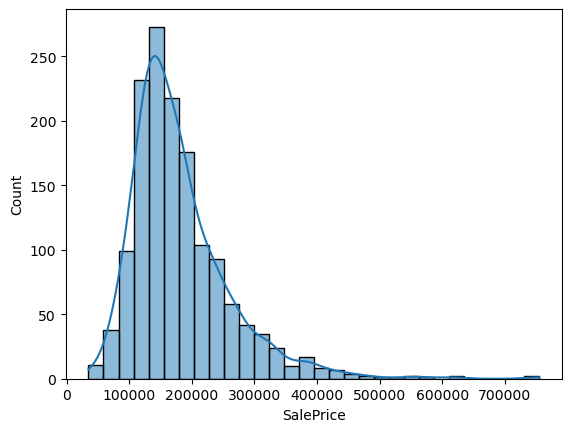

In [9]:
sns.histplot(data['SalePrice'], bins=30, kde=True)

#### Calculating skewness

In [10]:
data['SalePrice'].skew()

np.float64(1.8828757597682129)

#### Taking `log` to normalize the distribution

In [11]:
data["SalePrice"] = np.log1p(data["SalePrice"])

Text(0.5, 1.0, 'Normalized SalePrice')

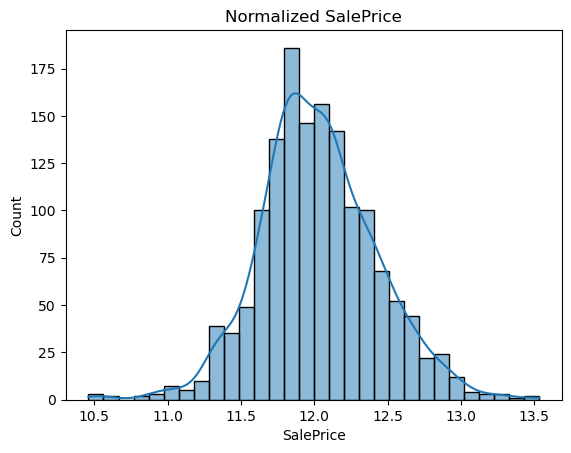

In [12]:
sns.histplot(data['SalePrice'], bins=30, kde=True)
plt.title("Normalized SalePrice")

#### Now, it looks like a normal distribution and is a good sign to continue

<hr>

#### Missing Values

In [13]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
data.loc[:, data.isna().sum() > 0]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,NaN,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,NaN,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,NaN,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,NaN,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,NaN,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [15]:
data.loc[:, data.isna().sum() > 0].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [16]:
data.loc[:, data.isna().sum() > 0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    588 non-null    object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

<hr>

#### Dropping of columns

In [17]:
def drop_columns(df, columns:list):
    return df.drop(columns=columns, errors='ignore')

#### Overall, both `Utilities` and `Street` have one value for all observations and they do not have any effect in prediction. So, it is best to drop these columns.

In [18]:
data['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [19]:
data['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

#### Saving `Id` of test dataset for final prediction purposes in the end after sorting out the powerful model

In [20]:
test_id = df_test[['Id']].copy()

In [21]:
data = drop_columns(data, ['Id','Street', 'Utilities', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'])
df_test = drop_columns(df_test, ['Id','Street', 'Utilities', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'])

#### `GrLivArea` has potential outliers and candidate for investigation

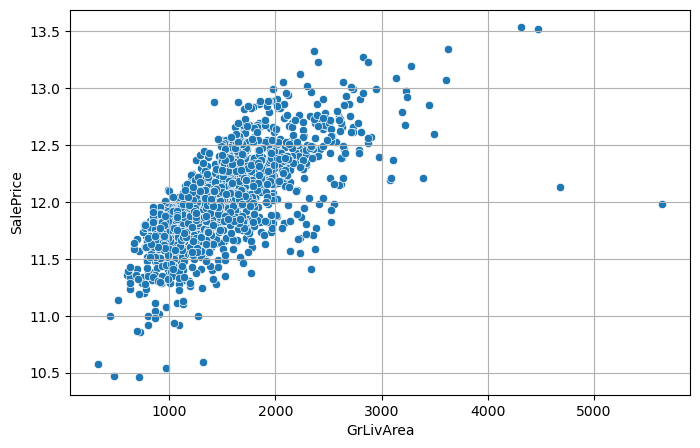

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["GrLivArea"], y=data["SalePrice"])
plt.grid(True)

#### Dropping any house having `GrLivArea` more than 4500 area square feet 

In [23]:
data = data.drop(data[data['GrLivArea'] > 4500].index).reset_index(drop=True)

In [24]:
data.loc[:, data.isna().sum() > 0].isna().sum()

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [25]:
data.loc[:, data.isna().sum() > 0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1199 non-null   float64
 1   MasVnrType    586 non-null    object 
 2   MasVnrArea    1450 non-null   float64
 3   BsmtQual      1421 non-null   object 
 4   BsmtCond      1421 non-null   object 
 5   BsmtExposure  1420 non-null   object 
 6   BsmtFinType1  1421 non-null   object 
 7   BsmtFinType2  1420 non-null   object 
 8   Electrical    1457 non-null   object 
 9   FireplaceQu   768 non-null    object 
 10  GarageType    1377 non-null   object 
 11  GarageYrBlt   1377 non-null   float64
 12  GarageFinish  1377 non-null   object 
 13  GarageQual    1377 non-null   object 
 14  GarageCond    1377 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.0+ KB


<hr>

#### Handling Missing Values

`LotFrontage`

#### Train dataset

In [26]:
lot_neighborhood = data.groupby('Neighborhood')['LotFrontage'].agg(["mean", "median"])
lot_neighborhood

,mean,median
Neighborhood,,
Blmngtn,47.142857,43.0
Blueste,24.000000,24.0
BrDale,21.562500,21.0
BrkSide,57.509804,52.0
ClearCr,83.461538,80.0
CollgCr,71.682540,70.0
Crawfor,71.804878,74.0
Edwards,64.811111,64.5
Gilbert,79.877551,65.0


In [27]:
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#### Filling NA values in corresponding column of test dataset to avoid any data leakage

In [28]:
df_test[df_test['LotFrontage'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
6,20,RL,NaN,7980,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,21,0,0,0,0,500,3,2010,WD,Normal
40,160,FV,NaN,2980,Reg,Lvl,Corner,Gtl,Somerst,Norm,...,32,0,0,0,0,0,5,2010,WD,Normal
41,160,FV,NaN,2403,IR1,Lvl,FR2,Gtl,Somerst,Norm,...,50,0,0,0,0,0,6,2010,WD,Normal
45,20,RL,NaN,10456,IR1,Lvl,Inside,Gtl,NWAmes,Norm,...,76,0,0,0,0,0,5,2010,WD,Normal
47,50,RL,NaN,18837,IR1,Lvl,Inside,Gtl,NWAmes,Norm,...,69,0,0,0,0,0,4,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,20,RL,NaN,11088,Reg,Lvl,Corner,Gtl,CollgCr,Norm,...,166,0,0,0,0,0,6,2006,WD,Normal
1390,60,RL,NaN,21533,IR2,Lvl,FR2,Gtl,CollgCr,Feedr,...,48,0,0,0,0,0,8,2006,WD,Normal
1440,20,RL,NaN,50102,IR1,Low,Inside,Mod,Timber,Norm,...,0,0,0,138,0,0,3,2006,WD,Alloca
1441,20,RL,NaN,8098,IR1,Lvl,Inside,Gtl,Timber,Norm,...,173,0,0,0,0,0,10,2006,WD,Normal


In [29]:
df_test.shape

(1459, 73)

In [30]:
lot_median_map = lot_neighborhood['median'].to_dict()
lot_median_map

{'Blmngtn': 43.0,
 'Blueste': 24.0,
 'BrDale': 21.0,
 'BrkSide': 52.0,
 'ClearCr': 80.0,
 'CollgCr': 70.0,
 'Crawfor': 74.0,
 'Edwards': 64.5,
 'Gilbert': 65.0,
 'IDOTRR': 60.0,
 'MeadowV': 21.0,
 'Mitchel': 73.0,
 'NAmes': 73.0,
 'NPkVill': 24.0,
 'NWAmes': 80.0,
 'NoRidge': 91.0,
 'NridgHt': 88.5,
 'OldTown': 60.0,
 'SWISU': 60.0,
 'Sawyer': 71.0,
 'SawyerW': 66.5,
 'Somerst': 73.5,
 'StoneBr': 61.5,
 'Timber': 85.0,
 'Veenker': 68.0}

In [31]:
df_test['LotFrontage'] = df_test.apply(
    lambda row: lot_median_map[row['Neighborhood']] if pd.isna(row['LotFrontage']) else row['LotFrontage'], axis=1
)

In [32]:
df_test[df_test['Neighborhood'] == 'Gilbert']

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,36,0,0,0,0,0,6,2010,WD,Normal
5,60,RL,75.0,10000,IR1,Lvl,Corner,Gtl,Gilbert,Norm,...,84,0,0,0,0,0,4,2010,WD,Normal
6,20,RL,65.0,7980,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,21,0,0,0,0,500,3,2010,WD,Normal
7,60,RL,63.0,8402,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,75,0,0,0,0,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,60,RL,96.0,11631,IR1,Lvl,Corner,Gtl,Gilbert,Norm,...,46,0,0,0,0,0,6,2006,New,Partial
1210,60,RL,75.0,9073,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,32,0,0,0,0,0,10,2006,New,Partial
1215,60,RL,59.0,9171,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,48,0,0,0,0,0,7,2006,WD,Normal
1216,60,RL,65.0,8658,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,0,0,0,0,0,0,4,2006,WD,Normal


<hr>

#### Converting numerical features into categorical according to the documentation

In [33]:
data[['MSSubClass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MSSubClass  1458 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [34]:
df_test[['MSSubClass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MSSubClass  1459 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [35]:
def num_to_category(df, columns):
    df[columns] = df[columns].astype(str)
    return df

In [36]:
data = num_to_category(data, columns = ['MSSubClass'])
df_test = num_to_category(df_test, columns = ['MSSubClass'])

<hr>

#### Recoding according to the documentation

#### According to the documentation, the following columns' NaN values are fixed at 0 meaning 'no basement and etc': `BsmtFinSF1`, `BsmtFinSF2`, `BsmtFullBath`, `BsmtHalfBath`, and `MasVnrArea`

In [37]:
data[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"]].isna().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtFullBath    0
BsmtHalfBath    0
MasVnrArea      8
dtype: int64

In [38]:
df_test[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"]].isna().sum()

BsmtFinSF1       1
BsmtFinSF2       1
BsmtFullBath     2
BsmtHalfBath     2
MasVnrArea      15
dtype: int64

In [113]:
# function to convert na values to 0
def nan_to_0(df, columns):
    df = df.copy()
    df[columns] = df[columns].fillna(0)
    return df

In [40]:
data = nan_to_0(data, ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"])
df_test = nan_to_0(df_test, ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"])

In [41]:
print('Train:')
print(data[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"]].isna().sum())
print('_________________')
print('Test:')
print(df_test[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"]].isna().sum())

Train:
BsmtFinSF1      0
BsmtFinSF2      0
BsmtFullBath    0
BsmtHalfBath    0
MasVnrArea      0
dtype: int64
_________________
Test:
BsmtFinSF1      0
BsmtFinSF2      0
BsmtFullBath    0
BsmtHalfBath    0
MasVnrArea      0
dtype: int64


<hr>

#### Imputation with median value for all remaining numerical columns

In [114]:
# function that takes non-object columns and imputes with median value of that column
def nan_to_median(df):
    return df.apply(lambda col: col.fillna(col.median()) if col.dtype != 'O' else col)

In [43]:
data.loc[:, data.isna().sum() > 0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrType    586 non-null    object 
 1   BsmtQual      1421 non-null   object 
 2   BsmtCond      1421 non-null   object 
 3   BsmtExposure  1420 non-null   object 
 4   BsmtFinType1  1421 non-null   object 
 5   BsmtFinType2  1420 non-null   object 
 6   Electrical    1457 non-null   object 
 7   FireplaceQu   768 non-null    object 
 8   GarageType    1377 non-null   object 
 9   GarageYrBlt   1377 non-null   float64
 10  GarageFinish  1377 non-null   object 
 11  GarageQual    1377 non-null   object 
 12  GarageCond    1377 non-null   object 
dtypes: float64(1), object(12)
memory usage: 148.2+ KB


In [44]:
df_test.loc[:, df_test.isna().sum() > 0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   Exterior1st   1458 non-null   object 
 2   Exterior2nd   1458 non-null   object 
 3   MasVnrType    565 non-null    object 
 4   BsmtQual      1415 non-null   object 
 5   BsmtCond      1414 non-null   object 
 6   BsmtExposure  1415 non-null   object 
 7   BsmtFinType1  1417 non-null   object 
 8   BsmtFinType2  1417 non-null   object 
 9   BsmtUnfSF     1458 non-null   float64
 10  TotalBsmtSF   1458 non-null   float64
 11  KitchenQual   1458 non-null   object 
 12  Functional    1457 non-null   object 
 13  FireplaceQu   729 non-null    object 
 14  GarageType    1383 non-null   object 
 15  GarageYrBlt   1381 non-null   float64
 16  GarageFinish  1381 non-null   object 
 17  GarageCars    1458 non-null   float64
 18  GarageArea    1458 non-null 

In [45]:
data = nan_to_median(data)
# df_test = nan_to_median(df_test)

#### To avoid data leakage, the median values from train dataset was used for imputation puproses

In [46]:
def nan_to_median_from_train(train_df, test_df):
    
    return test_df.apply(lambda col: col.fillna(train_df[col.name].median()) 
                         if col.name in train_df.columns and col.dtype != 'O' else col)

In [47]:
df_test = nan_to_median_from_train(data, df_test)

In [48]:
data.loc[:, data.isna().sum() > 0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MasVnrType    586 non-null    object
 1   BsmtQual      1421 non-null   object
 2   BsmtCond      1421 non-null   object
 3   BsmtExposure  1420 non-null   object
 4   BsmtFinType1  1421 non-null   object
 5   BsmtFinType2  1420 non-null   object
 6   Electrical    1457 non-null   object
 7   FireplaceQu   768 non-null    object
 8   GarageType    1377 non-null   object
 9   GarageFinish  1377 non-null   object
 10  GarageQual    1377 non-null   object
 11  GarageCond    1377 non-null   object
dtypes: object(12)
memory usage: 136.8+ KB


In [49]:
df_test.loc[:, df_test.isna().sum() > 0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1455 non-null   object
 1   Exterior1st   1458 non-null   object
 2   Exterior2nd   1458 non-null   object
 3   MasVnrType    565 non-null    object
 4   BsmtQual      1415 non-null   object
 5   BsmtCond      1414 non-null   object
 6   BsmtExposure  1415 non-null   object
 7   BsmtFinType1  1417 non-null   object
 8   BsmtFinType2  1417 non-null   object
 9   KitchenQual   1458 non-null   object
 10  Functional    1457 non-null   object
 11  FireplaceQu   729 non-null    object
 12  GarageType    1383 non-null   object
 13  GarageFinish  1381 non-null   object
 14  GarageQual    1381 non-null   object
 15  GarageCond    1381 non-null   object
 16  SaleType      1458 non-null   object
dtypes: object(17)
memory usage: 193.9+ KB


<hr>

#### From categorical to numerical

##### handling missing values according to the documentation and mode of the columns

In [50]:
# mode
selected_columns = ['Electrical', 'Condition1', 'Condition2', 'ExterCond', 'ExterQual', 'Functional', 'HeatingQC', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']  # Specify the columns

for col in selected_columns:
    if col in data.columns:
        print(f"Mode of {col}: {data[col].value_counts().idxmax()}")

Mode of Electrical: SBrkr
Mode of Condition1: Norm
Mode of Condition2: Norm
Mode of ExterCond: TA
Mode of ExterQual: TA
Mode of Functional: Typ
Mode of HeatingQC: Ex
Mode of KitchenQual: TA
Mode of Exterior1st: VinylSd
Mode of Exterior2nd: VinylSd
Mode of SaleType: WD


In [115]:
# List of values to replace Nan values
nan_to_meaningful = [("MasVnrType","None"),
                  ("BsmtQual","NoB"), 
                  ("Electrical", "SBrkr"),
                  ("BsmtCond","NoB"),
                  ("BsmtExposure","NoB"),
                  ("BsmtFinType1","NoB"),
                  ("BsmtFinType2","NoB"),
                  ("CentralAir","N"),
                  ("Condition1","Norm"), 
                  ("Condition2","Norm"),
                  ("ExterCond","TA"),
                  ("ExterQual","TA"), 
                  ("FireplaceQu","No"),
                  ("Functional","Typ"),
                  ("GarageType","No"), 
                  ("GarageFinish","No"), 
                  ("GarageQual","No"), 
                  ("GarageCond","No"), 
                  ("HeatingQC","TA"), 
                  ("KitchenQual","TA"),      
                  ("MSZoning", "None"),
                  ("Exterior1st", "VinylSd"), 
                  ("Exterior2nd", "VinylSd"), 
                  ("SaleType", "WD")]

In [52]:
def nan_to_mode(df, list_of_values):
    
    for col, value in list_of_values:
        if col in df.columns:
            df[col] = df[col].fillna(value)
    return df

In [53]:
data = nan_to_mode(data, nan_to_meaningful)
df_test = nan_to_mode(df_test, nan_to_meaningful)

In [54]:
data.loc[:, data.isna().sum() > 0].isna().sum()

Series([], dtype: float64)

In [55]:
df_test.loc[:, df_test.isna().sum() > 0].isna().sum()

Series([], dtype: float64)

<hr>

#### Working with skewness

#### Getting skewed features

In [56]:
def get_skewed_features(df, exclude_cols=None, skew_threshold=0.5):

    if exclude_cols is None:
        exclude_cols = []
    
    num_features = df.select_dtypes(include=['number']).columns.tolist()
    numeric_features = [feat for feat in num_features if feat not in exclude_cols]

    skewed_features = df[numeric_features].apply(lambda x: x.dropna().skew())

    skewed_features = skewed_features[skewed_features > skew_threshold].index.tolist()

    return skewed_features

In [57]:
skewed_feats = get_skewed_features(data, exclude_cols=['SalePrice'], skew_threshold=0.5)
print("\nHighly skewed features: \n\n{}".format(skewed_feats))


Highly skewed features: 

['LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


#### Applying `PowerTransformer` to avoid skewness

In [58]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True)

data[skewed_feats] = pt.fit_transform(data[skewed_feats])
df_test[skewed_feats] = pt.transform(df_test[skewed_feats])

<hr>

#### Recoding categorical columns into numerical based on ordinal ratings according to the documentation

In [59]:
ordinal_columns = {
    'KitchenQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'CentralAir': {'N': 0, 'Y': 1},
    'HeatingQC': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'ExterCond': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'ExterQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
    'LotShape': {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}
}

In [60]:
# train
for col, mapping in ordinal_columns.items():
    if col in data.columns:
        data[col] = data[col].map(mapping)

In [61]:
# test
for col, mapping in ordinal_columns.items():
    if col in df_test.columns:
        df_test[col] = df_test[col].map(mapping)

<hr>

#### Feature Engineering

In [62]:
# Total Square Feet
data["TotalSqrtFeet"] = data["GrLivArea"] + data["TotalBsmtSF"]
df_test["TotalSqrtFeet"] = df_test["GrLivArea"] + df_test["TotalBsmtSF"]

# Total number of bathrooms
data["TotalBaths"] = data["BsmtFullBath"] + (data["BsmtHalfBath"]  * 0.5) + data["FullBath"] + (data["HalfBath"]* 0.5)
df_test["TotalBaths"] = df_test["BsmtFullBath"] + (df_test["BsmtHalfBath"]  * 0.5) + df_test["FullBath"] + (df_test["HalfBath"]* 0.5)

# has a garage
data['has_garage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['has_garage'] = df_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# has a fireplace
data['has_fireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_test['has_fireplace'] = df_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# has a pool
data['has_pool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['has_pool'] = df_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# has second floor
data['has_secondfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_test['has_secondfloor'] = df_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

# has Open Porch
data['has_OpenPorch'] = data['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
df_test['has_OpenPorch'] = df_test['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)

# has Wood Deck
data['has_WoodDeck'] = data['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
df_test['has_WoodDeck'] = df_test['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)

# has basement
data['has_basement'] = data['BsmtQual'].apply(lambda x: 0 if x == 'NoB' else 1)
df_test['has_basement'] = df_test['BsmtQual'].apply(lambda x: 0 if x == 'NoB' else 1)

<hr>

#### Models

In [63]:
data.shape

(1458, 83)

In [64]:
y_train = data["SalePrice"]
data = data.drop(["SalePrice"], axis = 1)

#### Converting all other categorical columns into numerical ones using `OneHotEncoder`

In [65]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

ohe = OneHotEncoder(handle_unknown='ignore', drop='first')

train_encoded = ohe.fit_transform(data[categorical_cols])
test_encoded = ohe.transform(df_test[categorical_cols])

train_encoded = pd.DataFrame(train_encoded.toarray(), columns=ohe.get_feature_names_out(), index=data.index)
test_encoded = pd.DataFrame(test_encoded.toarray(), columns=ohe.get_feature_names_out(), index=df_test.index)

train_data = data.drop(columns=categorical_cols).reset_index(drop=True)
test_data = df_test.drop(columns=categorical_cols).reset_index(drop=True)

train_data_final = pd.concat([train_data, train_encoded], axis=1)
test_data_final = pd.concat([test_data, test_encoded], axis=1)

print(train_data_final.shape, test_data_final.shape)


(1458, 252) (1459, 252)


In [66]:
X_train = train_data_final

#### RMSE calculation

In [67]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

#### GradienBoostingRegressor

#### Initial model with random parameters (or from my previous works) before using `Optuna` to identify best parameters

In [68]:
gbr = GradientBoostingRegressor(random_state=0)
param_grid = {'n_estimators': [2500],
              'max_features': [13],
              'max_depth': [5],
              'learning_rate': [0.05],
              'subsample': [0.8],
             'random_state' : [5]}
                              
gb_model = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=1, cv=5)
gb_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=1,
             param_grid={'learning_rate': [0.05], 'max_depth': [5],
                         'max_features': [13], 'n_estimators': [2500],
                         'random_state': [5], 'subsample': [0.8]})

In [93]:
y_train_pred_gb = gb_model.predict(X_train)
print('Best Parameters: {}'.format(gb_model.best_params_))
gb_model_rmse = cv_rmse(gb_model).mean()
print("RMSE score for GB: {:.3f}".format(gb_model_rmse))

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 13, 'n_estimators': 2500, 'random_state': 5, 'subsample': 0.8}
RMSE score for GB: 0.119


#### Implementing `Optuna` to find the best parameters for the model

In [70]:
def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 500, 3500, step=500) 
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.2, log=True)  
    max_depth = trial.suggest_int("max_depth", 3, 10) 
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"]) 
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 10, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 5, 20)
    loss = trial.suggest_categorical("loss", ["huber", "squared_error", "absolute_error"])
    
    gbr = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        loss=loss,
        random_state=42
    )

    score = cross_val_score(gbr, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
    
    return -np.mean(score)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best Hyperparameters:", study.best_params)
print("Best RMSE Score:", study.best_value)

[I 2025-02-25 15:36:44,150] A new study created in memory with name: no-name-c3ea3d3a-1874-4cb0-8ee1-bc578cf7d2d2
[I 2025-02-25 15:36:50,242] Trial 0 finished with value: 0.11995873315734458 and parameters: {'n_estimators': 2500, 'learning_rate': 0.14129604262641163, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 12, 'min_samples_split': 7, 'loss': 'huber'}. Best is trial 0 with value: 0.11995873315734458.
[I 2025-02-25 15:37:02,828] Trial 1 finished with value: 0.11815535651480027 and parameters: {'n_estimators': 2500, 'learning_rate': 0.03956244682480925, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 20, 'loss': 'huber'}. Best is trial 1 with value: 0.11815535651480027.
[I 2025-02-25 15:37:04,883] Trial 2 finished with value: 0.11835428204260301 and parameters: {'n_estimators': 2500, 'learning_rate': 0.027465772534153613, 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 8, 'loss': 'squared_error'

Best Hyperparameters: {'n_estimators': 2000, 'learning_rate': 0.024465448413645098, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 11, 'min_samples_split': 6, 'loss': 'huber'}
Best RMSE Score: 0.11320877023342946


In [94]:
best_params = study.best_params
gbr_best = GradientBoostingRegressor(**best_params, random_state=42)
gbr_best.fit(X_train, y_train)


y_train_pred_gb_best = gbr_best.predict(X_train)
print('Best Parameters: {}'.format(best_params))
gbr_best_rmse = cv_rmse(gbr_best).mean()
print("RMSE score for GB: {:.3f}".format(gbr_best_rmse))


Best Parameters: {'n_estimators': 2000, 'learning_rate': 0.024465448413645098, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 11, 'min_samples_split': 6, 'loss': 'huber'}
RMSE score for GB: 0.113


#### XGBoost

In [72]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [95]:
xgboost.fit(X_train, y_train)
y_train_pred_xgboost = xgboost.predict(X_train)
xgboost_rmse = cv_rmse(xgboost).mean()
print("RMSE score for XGBoost: {:.3f}".format(xgboost_rmse))

RMSE score for XGBoost: 0.116


In [74]:
def objective_xgboost(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 500, 4000, step=500),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 0, 10),
        "gamma": trial.suggest_float("gamma", 0, 1.0),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-6, 1.0, log=True),
        "objective": "reg:linear",
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.8, 1.2),
        "n_jobs": -1,
        "random_state": 27
    }

    xgb_model = XGBRegressor(**params)

    score = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)

    return -np.mean(score)


study_xg = optuna.create_study(direction="minimize")
study_xg.optimize(objective_xgboost, n_trials=50)

print("Best Hyperparameters:", study_xg.best_params)
print("Best RMSE Score:", study_xg.best_value)

[I 2025-02-25 15:45:01,411] A new study created in memory with name: no-name-f6700bed-8365-4edf-972e-45f544fb3e73
/Users/azizbek.ussenov/anaconda3/envs/mining/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:01] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/Users/azizbek.ussenov/anaconda3/envs/mining/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:01] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/Users/azizbek.ussenov/anaconda3/envs/mining/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:01] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y

Best Hyperparameters: {'n_estimators': 4000, 'learning_rate': 0.018109894910835544, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 0.054890404428716774, 'subsample': 0.5544619482813681, 'colsample_bytree': 0.5751068606228247, 'reg_alpha': 0.0035719741373681684, 'scale_pos_weight': 1.1088995614254609}
Best RMSE Score: 0.11539330186720761


In [103]:
best_params_xg = study_xg.best_params
xgb_best = XGBRegressor(**best_params_xg, random_state=27)
xgb_best.fit(X_train, y_train)


y_train_pred_xgb_best = xgb_best.predict(X_train)
print('Best Parameters: {}'.format(best_params_xg))
xgb_best_rmse = cv_rmse(xgb_best).mean()
print("RMSE score for XGBoost_best: {:.3f}".format(xgb_best_rmse))

Best Parameters: {'n_estimators': 4000, 'learning_rate': 0.018109894910835544, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 0.054890404428716774, 'subsample': 0.5544619482813681, 'colsample_bytree': 0.5751068606228247, 'reg_alpha': 0.0035719741373681684, 'scale_pos_weight': 1.1088995614254609}
RMSE score for XGBoost_best: 0.116


#### LightGBM

In [76]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [102]:
lightgbm.fit(X_train, y_train)
y_train_pred_lightgbm = lightgbm.predict(X_train)
lightgbm_rmse = cv_rmse(lightgbm).mean()
print("RMSE score for LightGBM: {:.3f}".format(lightgbm_rmse))

RMSE score for LightGBM: 0.114


In [78]:
def objective_lightgbm(trial):
    
    params = {
        "num_leaves": trial.suggest_int("num_leaves", 2, 50),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.2, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 500, 5000, step=500),
        "max_bin": trial.suggest_int("max_bin", 100, 300),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "bagging_seed": 7,
        "feature_fraction": trial.suggest_float("feature_fraction", 0.1, 1.0),
        "feature_fraction_seed": 7,
        "verbose": -1,
    }

    lgb_model = LGBMRegressor(**params)

    score = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)

    return -np.mean(score)

study_lightgbm = optuna.create_study(direction="minimize")
study_lightgbm.optimize(objective_lightgbm, n_trials=50)

[I 2025-02-25 15:48:41,448] A new study created in memory with name: no-name-c2ef1ef0-6998-4960-8adb-e50c923698f7
[I 2025-02-25 15:48:48,044] Trial 0 finished with value: 0.11749282947718184 and parameters: {'num_leaves': 6, 'learning_rate': 0.005915821482909523, 'n_estimators': 2000, 'max_bin': 201, 'bagging_fraction': 0.6956384659581715, 'bagging_freq': 3, 'feature_fraction': 0.6148019296512907}. Best is trial 0 with value: 0.11749282947718184.
[I 2025-02-25 15:49:00,844] Trial 1 finished with value: 0.11680832130039318 and parameters: {'num_leaves': 16, 'learning_rate': 0.012823559633341315, 'n_estimators': 1500, 'max_bin': 233, 'bagging_fraction': 0.8837705297296403, 'bagging_freq': 7, 'feature_fraction': 0.2916824399547398}. Best is trial 1 with value: 0.11680832130039318.
[I 2025-02-25 15:49:10,985] Trial 2 finished with value: 0.1332312215793239 and parameters: {'num_leaves': 22, 'learning_rate': 0.13245398463843272, 'n_estimators': 1000, 'max_bin': 277, 'bagging_fraction': 0.56

In [101]:
best_params_lightgbm = study_lightgbm.best_params
lightgbm_best = LGBMRegressor(**best_params_lightgbm, random_state=27)
lightgbm_best.fit(X_train, y_train)

y_train_pred_lightgbm_best = lightgbm_best.predict(X_train)
print('Best Parameters: {}'.format(best_params_lightgbm))
lightgbm_best_rmse = cv_rmse(lightgbm_best).mean()
print("RMSE score for LightGBM_best: {:.3f}".format(lightgbm_best_rmse))

Best Parameters: {'num_leaves': 9, 'learning_rate': 0.00586487024454042, 'n_estimators': 5000, 'max_bin': 261, 'bagging_fraction': 0.7966779620449668, 'bagging_freq': 1, 'feature_fraction': 0.1977391116800671}
RMSE score for LightGBM_best: 0.115


#### ElasticNet

In [80]:
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=5000, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio, n_jobs=4))  

In [99]:
elasticnet.fit(X_train, y_train)
elasticnet_cv = elasticnet.named_steps["elasticnetcv"]
y_train_pred_elastic = elasticnet.predict(X_train)
print("Best Alpha:", elasticnet_cv.alpha_)
print("Best L1 Ratio:", elasticnet_cv.l1_ratio_)
elasticnet_cv_rmse = cv_rmse(elasticnet_cv).mean()
print("RMSE score for ElasticNet: {:.3f}".format(elasticnet_cv_rmse))

Best Alpha: 0.0002
Best L1 Ratio: 1.0
RMSE score for ElasticNet: 0.112


#### Stacking Regressor

Using LightGBM with best parametres from optuna as a regressor

In [82]:
stack_gen = StackingCVRegressor(regressors=(elasticnet_cv, gbr_best, xgb_best, lightgbm_best),
                                meta_regressor=xgb_best,
                                use_features_in_secondary=True)

In [104]:
stack_gen.fit(X_train, y_train)
y_train_pred_stack = stack_gen.predict(X_train)
stack_gen_rmse = cv_rmse(stack_gen).mean()
print("RMSE score for Stacked: {:.3f}".format(stack_gen_rmse))

RMSE score for Stacked: 0.111


In [110]:
pred_1 = np.expm1(stack_gen.predict(test_data_final))

submission_1 = pd.DataFrame()
submission_1['Id'] = test_id['Id']
submission_1['SalePrice'] = pred_1
submission_1.to_csv("submission_1.csv", index=False)

Using the initial LightGBM as regressor

In [105]:
stack_gen_1 = StackingCVRegressor(regressors=(elasticnet_cv, gbr_best, xgb_best, lightgbm),
                                meta_regressor=xgb_best,
                                use_features_in_secondary=True)

stack_gen_1.fit(X_train, y_train)
y_train_pred_stack_1 = stack_gen_1.predict(X_train)
stack_gen_1_rmse = cv_rmse(stack_gen_1).mean()
print("RMSE score for Stacked_1: {:.3f}".format(stack_gen_1_rmse))

RMSE score for Stacked_1: 0.111


In [111]:
pred_2 = np.expm1(stack_gen_1.predict(test_data_final))

submission_2 = pd.DataFrame()
submission_2['Id'] = test_id['Id']
submission_2['SalePrice'] = pred_2
submission_2.to_csv("submission_2.csv", index=False)

<hr>

#### Saving everything that takes too much time

In [107]:
import pickle

optuna_and_models = {
    "study_gbr": study,
    "study_xgb": study_xg,
    "study_lightgbm": study_lightgbm,
    "StackedRegressor": stack_gen,
    "gb_model_rmse": gb_model_rmse,
    "gbr_best_rmse": gbr_best_rmse,
    "xgboost_rmse": xgboost_rmse,
    "xgb_best_rmse": xgb_best_rmse,
    "lightgbm_rmse": lightgbm_rmse,
    "lightgbm_best_rmse": lightgbm_best_rmse,
    "elasticnet_cv_rmse": elasticnet_cv_rmse,
    "stack_gen_rmse": stack_gen_rmse,
    "stack_gen_1_rmse": stack_gen_1_rmse
}

with open("optuna_and_models.pkl", "wb") as f:
    pickle.dump(optuna_and_models, f)